# Libraries loading

In [30]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits, fetch_openml
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP 

%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_palette("bright")

# Datasets loading

In [5]:
pen_digits, pen_digits_labels = load_digits(return_X_y=True, as_frame=False)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
coil20 = pd.read_csv('./coil-20/coil20.csv')
coil20_labels = pd.read_csv('./coil-20/coil20_labels.csv')
fashion_mnist, fashion_mnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)

# Variation of UMAP hyperparameters n and min-dist

The data is the PenDigits <br>
n_neighbors from left to right:  [5, 20, 80, 320]<br>
min_dist from top to bottom: [0.0125, 0.05, 0.2, 0.8]

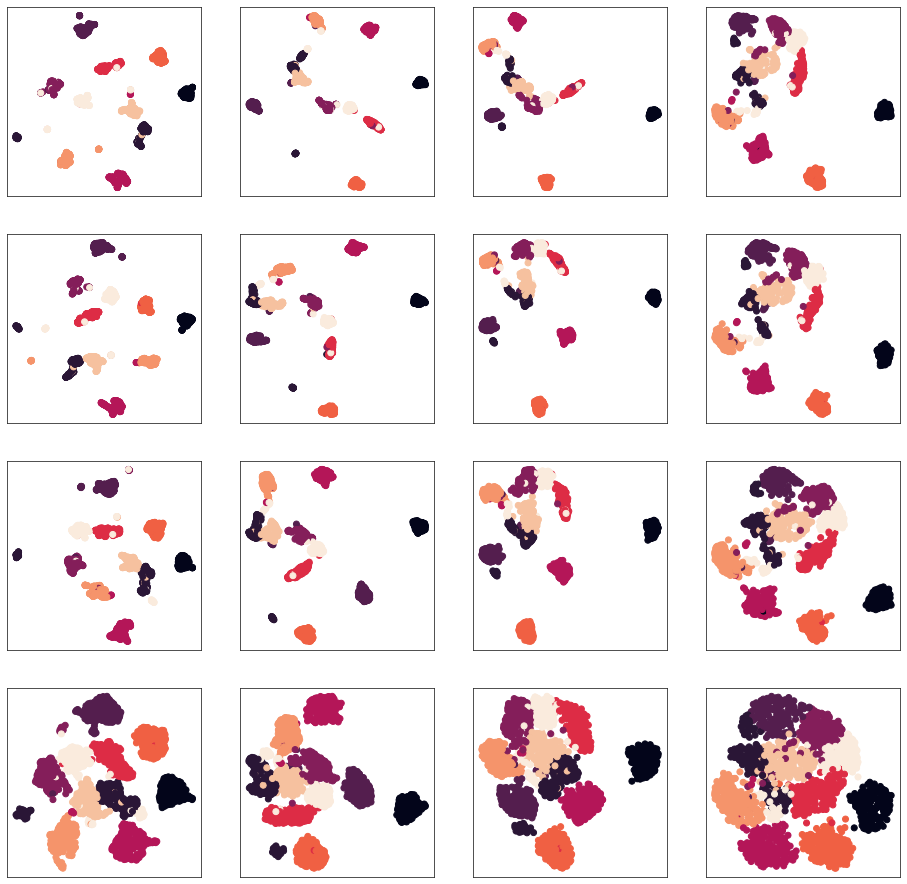

In [19]:
n_neighbors = [5, 20, 80, 320]
min_dist = [0.0125, 0.05, 0.2, 0.8]

fig, ax_array = plt.subplots(4, 4, figsize=(16, 16))
for ax1, dist in enumerate(min_dist):
  for ax2, neighbors in enumerate(n_neighbors):
    embedding = UMAP(n_neighbors = neighbors, min_dist = dist).fit_transform(pen_digits)
    ax_array[ax1, ax2].scatter(embedding[:, 0], embedding[:, 1], c=pen_digits_labels.astype(int))
    ax_array[ax1, ax2].set_xticks([])
    ax_array[ax1, ax2].set_yticks([])


The data is the MNIST dataset <br>
n_neighbors from left to right:  [5, 20, 80, 320]<br>
min_dist from top to bottom: [0.0125, 0.05, 0.2, 0.8]

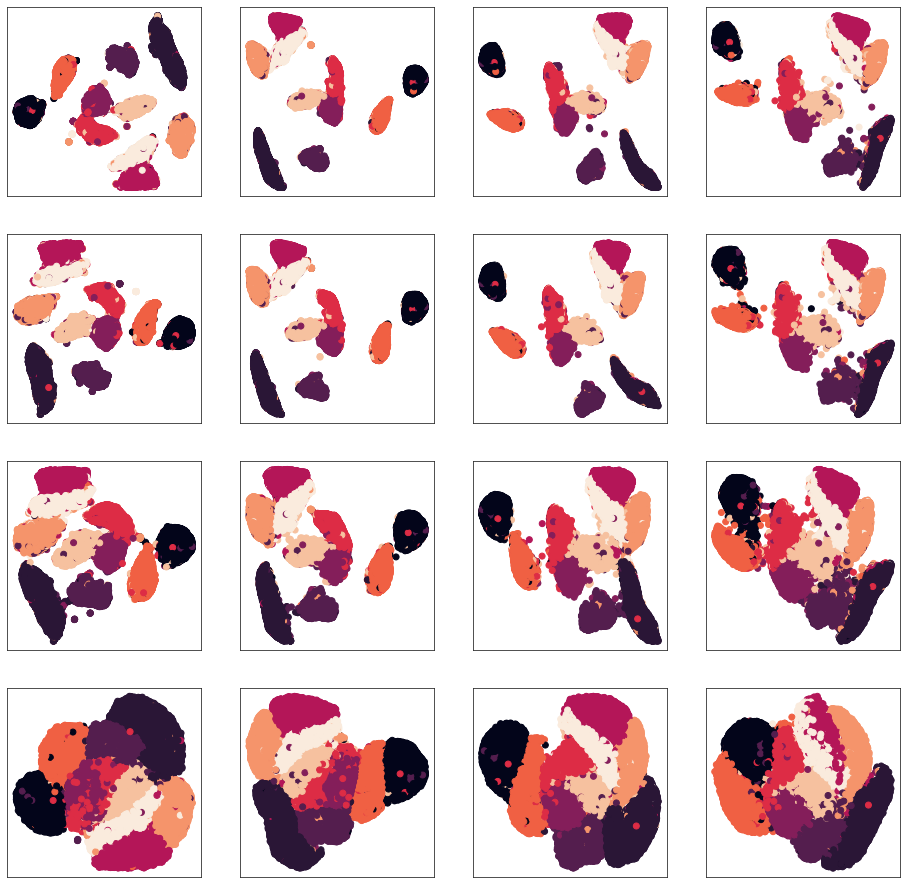

In [20]:
n_neighbors = [5, 20, 80, 320]
min_dist = [0.0125, 0.05, 0.2, 0.8]

fig, ax_array = plt.subplots(4, 4, figsize=(16, 16))
for ax1, dist in enumerate(min_dist):
  for ax2, neighbors in enumerate(n_neighbors):
    embedding = UMAP(n_neighbors = neighbors, min_dist = dist).fit_transform(mnist)
    ax_array[ax1, ax2].scatter(embedding[:, 0], embedding[:, 1], c=mnist_labels.astype(int))
    ax_array[ax1, ax2].set_xticks([])
    ax_array[ax1, ax2].set_yticks([])

# Qalitative Comparison of Multiple Algorithms

Datasets from left to right: COIL20, MNIST, Fashion MNIST, PenDigits<br>
Algorithms from top to bottom: UMAP, t-SNE, PCA, SVD

In [38]:
UMAP = UMAP()
t_SNE = TSNE()
PCA = PCA()
SVD = TruncatedSVD()

algorithms = [UMAP, t_SNE, PCA, SVD]
datasets = [[coil20, coil20_labels.values], [mnist, mnist_labels], [fashion_mnist, fashion_mnist_labels], [pen_digits, pen_digits_labels]]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default lea

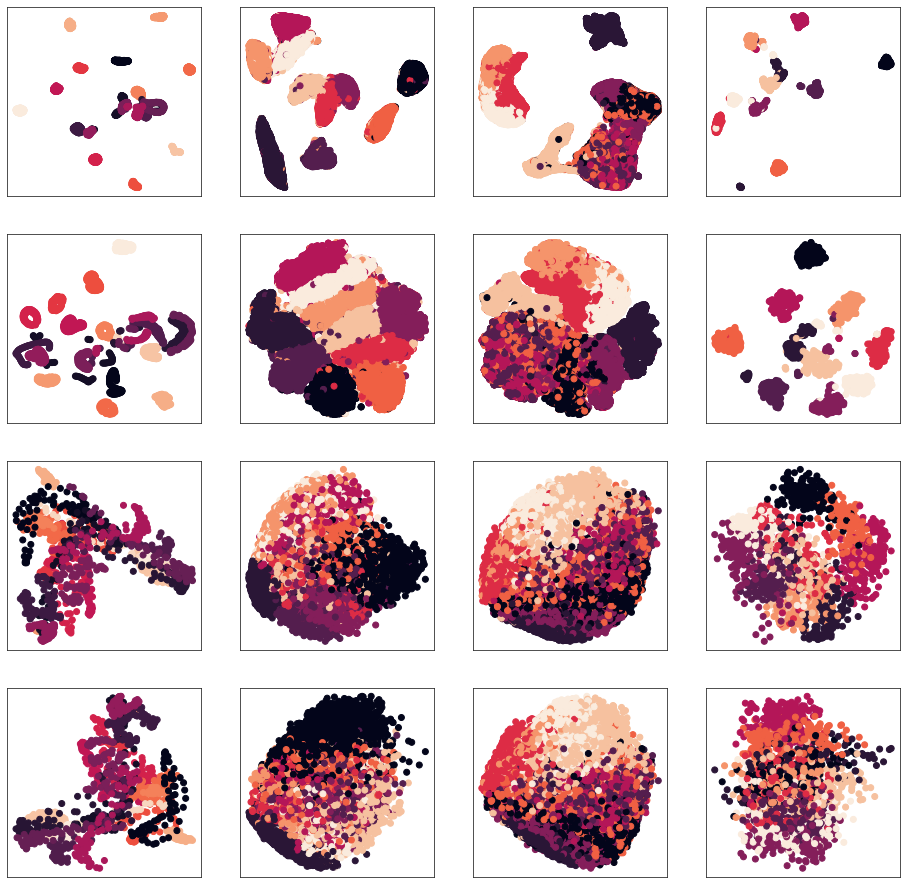

In [39]:
fig, ax_array = plt.subplots(4, 4, figsize=(16, 16))

for ax1, algorithm in enumerate(algorithms):
    for ax2, (dataset, labels) in enumerate(datasets):     
        embeddings = algorithm.fit_transform(dataset)
        ax_array[ax1, ax2].scatter(embeddings[:, 0], embeddings[:, 1], c=labels.astype(int))
        ax_array[ax1, ax2].set_xticks([])
        ax_array[ax1, ax2].set_yticks([])